## 2. Manipulation de datasets et visualisation

Nous travaillons sur le célèbre dataset MNIST consistant à reconnaître des images d'écriture manuscrite de chiffres (0 à 9).

In [4]:
import torch
import matplotlib.pyplot as plt

In [1]:
from torchvision import datasets, transforms

In [3]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_set = datasets.MNIST('./data', train=True, download=True, transform=trans)
test_set = datasets.MNIST('./data', train=False, download=True, transform=trans)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:07<00:00, 1.36MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 348kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 912kB/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Display des chiffres en couleurs:
- Les chiffres 0, 1, 2 en rouge
- Les chiffres 3, 4, 5, 6 en vert
- Les chiffres 7, 8, 9 en bleu

In [35]:
class gray2color_dataset(torch.utils.data.Dataset):
    def __init__(self, gray_dataset):
        self.gray_dataset = gray_dataset

    def __len__(self):
        return len(self.gray_dataset)

    def __getitem__(self, idx):
        x = self.gray_dataset.data[idx] # Récupérer l'image en niveaux de gris
        image = torch.zeros(3, x.shape[0], x.shape[1]) # Créer une image couleur vide
        x_normalized = x.float() / 255.0
        label = self.gray_dataset.targets[idx].item()
        # print("The dataset is:", self.gray_dataset)
        # print("The label is", label)
        if label in [0, 1, 2]: # Rouge
            channel_idx =0
        elif label in [3, 4, 5, 6]: # Vert
            channel_idx = 1     
        else: # Bleu
            channel_idx = 2
        image[channel_idx] = x_normalized
        return ( image , label )            

In [12]:
def imshow(tensor, title=None):
    img = tensor.cpu().clone()
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    if title is not None:
        plt.title(title)
    plt.pause(0.5)

In [13]:
def imshowcolor(in_tensor, title=None):
    img = in_tensor.cpu().clone()
    img = img.squeeze()
    plt.imshow(img.permute(1, 2, 0))
    if title is not None:
        plt.title(title)
    plt.pause(0.5)

In [36]:
color_dataset = gray2color_dataset(train_set)

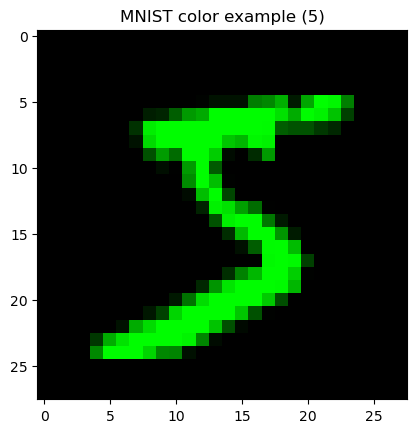

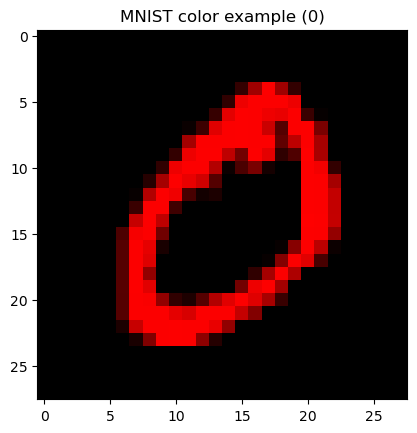

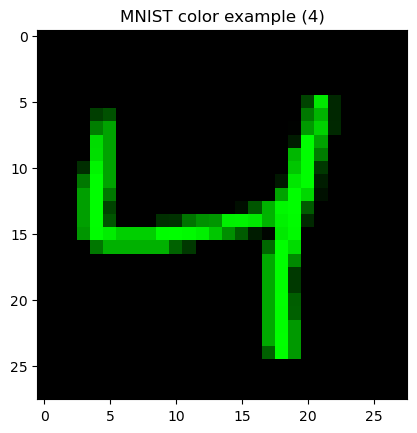

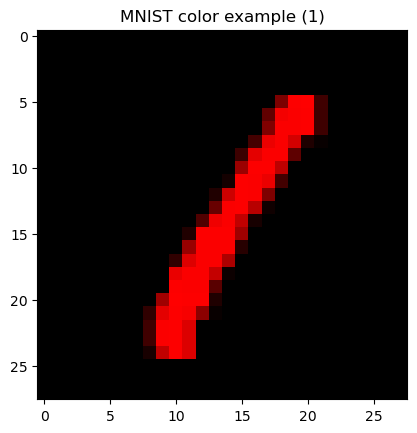

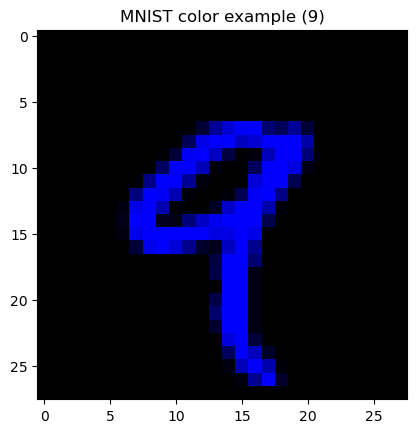

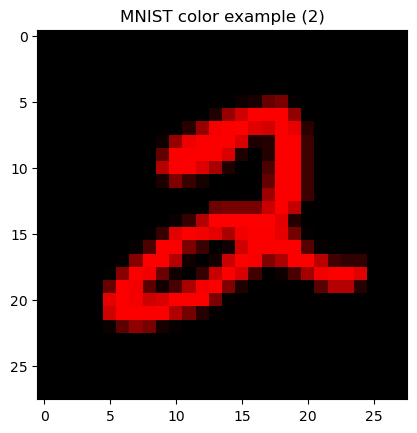

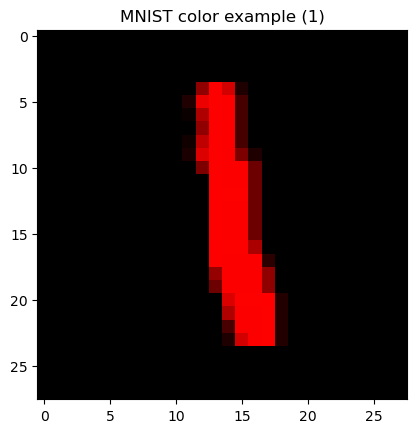

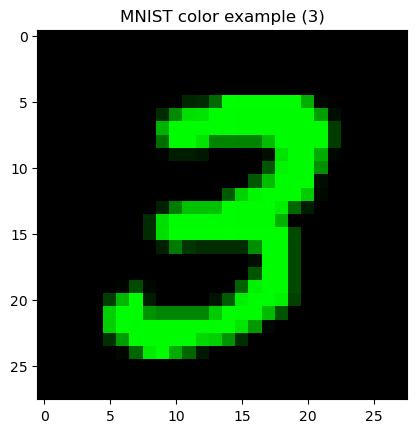

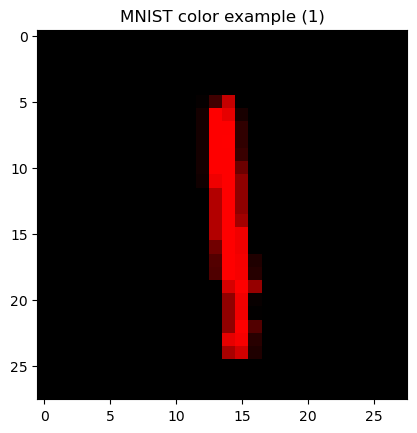

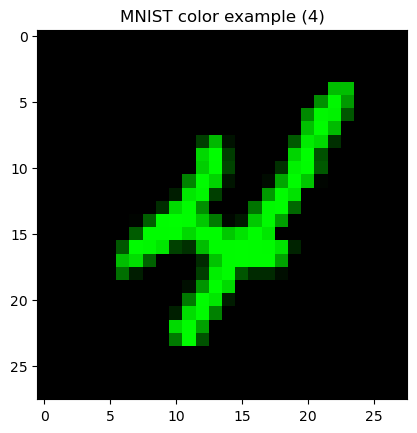

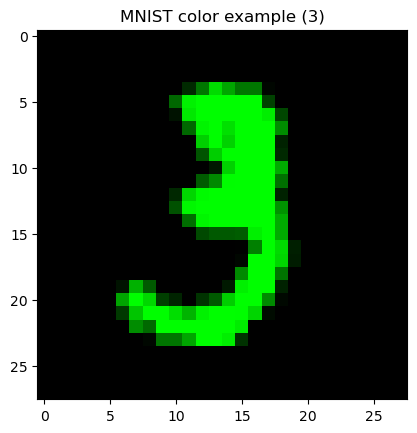

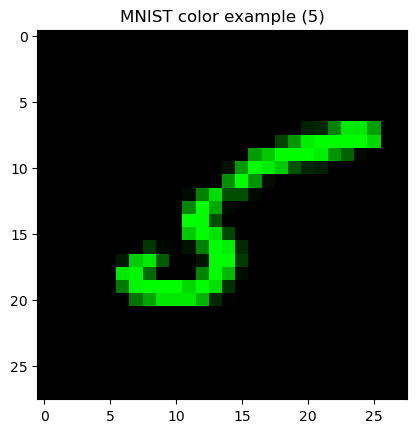

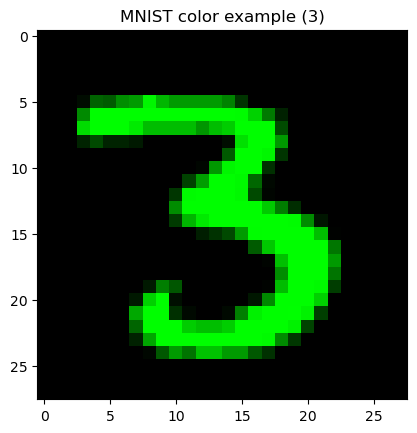

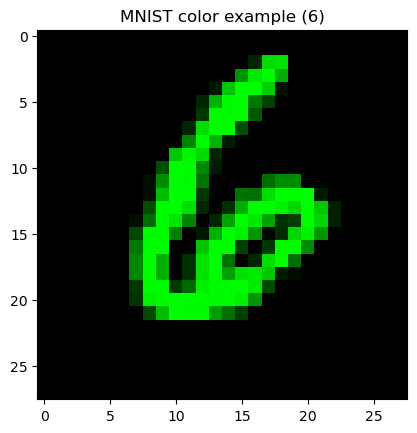

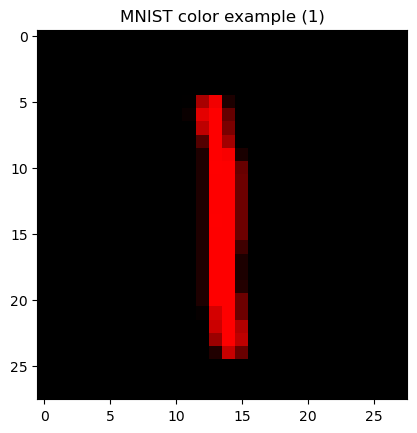

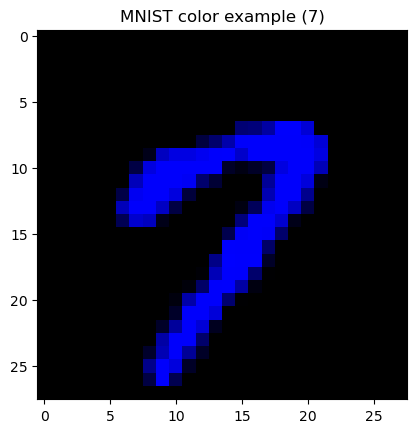

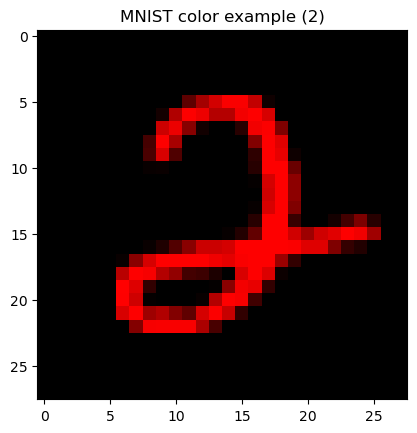

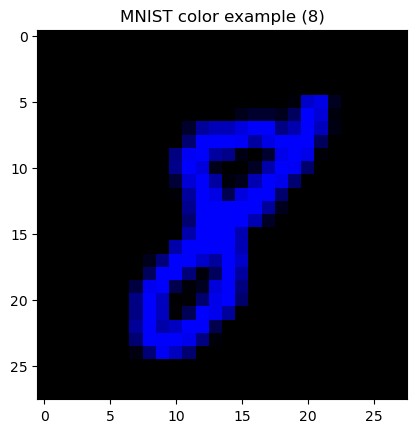

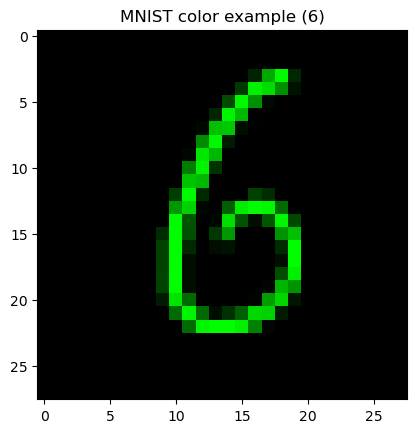

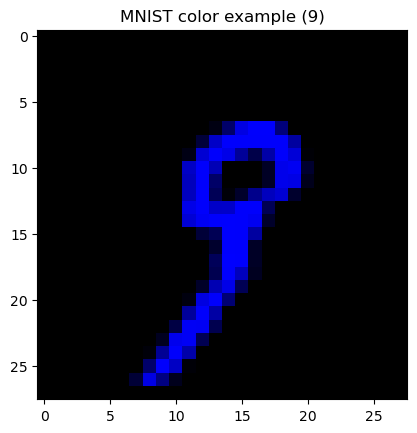

In [39]:
plt.figure()
for ii in range(20):
    imshowcolor(color_dataset[ii][0], title='MNIST color example ({})'.format(color_dataset[ii][1]))